In [4]:
import pandas as pd                           # загрузка библиотеки 
from tensorflow.keras.utils import get_file   # загрузка методов библиотеки
# попытка открытия файла 'kddcup.data_10_percent.gz'
try:
    f_name = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Ошибка загрузки')
    raise
    
print(f_name)                                 # вывод пути и имени файла 

# файл представлен в формате CSV, просто не указано расширение CSV и имена заголовков
# считывание содержимого файла в dataset
net_an = pd.read_csv(f_name, header=None)

2154496/2144903 [==============================] - 1s 0us/step
/root/.keras/datasets/kddcup.data_10_percent.gz


In [5]:
# поскольку dataset пока не имеет заголовков полей для сессиий, необходимо их добавить, а также дополнительный столбец
net_an.columns = [
    'duration',                   # продолжительность соединения
    'protocol_type',              # тип протокола (TCP, UDP...)
    'service',                    # служба назначения (telnet, ftp)
    'flag',                       # статус соединения
    'src_bytes',                  # кол-во байт, переданных от источника к приемнику
    'dst_bytes',                  # кол-во байт, переданных от приемника к источнику
    'land',                       # если адрес источника и приемника совпадают, это поле равно 1, иначе - 0
    'wrong_fragment',             # кол-во поврежденных фрагментов
    'urgent',                     # кол-во срочных пакетов  
    'hot',                        # кол-во горячих индикаторов 
    'num_failed_logins',          # кол-во неудачных попыток залогиниться (войти в сессию)
    'logged_in',                  # если вход выполнен, поле = 1, иначе = 0 
    'num_compromised',            # кол-во скомпрометированных состояний
    'root_shell',                 # если командный интерпретатор с уч. зап-ю root запущен, поле  = 1, иначе = 0  
    'su_attempted',               # если была попытка выполнения команды su, поле = 1, иначе  = 0 (временный вход в систему с другими учетными данными пользователя)
    'num_root',                   # кол-во корневых доступов
    'num_file_creations',         # кол-во операций создания новых файлов
    'num_shells',                 # кол-во активных интерпретаторов команд
    'num_access_files',           # кол-во операций обращения к файлам
    'num_outbound_cmds',          # кол-во исходящих команд в сеансе ftp
    'is_host_login',              # = 1, если логин есть в списке логинов хоста, иначе = 0
    'is_guest_login',             # = 1, если в систему вошел гость, иначе = 0
    'count',                      # кол-во подключений к тому же хосту, что и текущее подключение, с заданным интервалом
    'srv_count',                  # кол-во подключений к той же службе, что и текущее подключение, с заданным интервалом
    'serror_rate',                # % соединений с ошибками SYN
    'srv_serror_rate',            # % соединений с ошибками SYN
    'rerror_rate',                # % соединений с ошибками REJ
    'srv_rerror_rate',            # % соединений с ошибками REJ
    'same_srv_rate',              # % подключений к одной и той же службе
    'diff_srv_rate',              # % подключений к разным службам
    'srv_diff_host_rate',         # % подключений к разным хостам
    'dst_host_count',             # кол-во подключений к одному и тому же адресу приемника
    'dst_host_srv_count',         # кол-во подключений к одному и тому же адресу приемника, использующих одну и ту же службу
    'dst_host_same_srv_rate',     # % подключений к одному и тому же адресу приемника, использующих одну и ту же службу
    'dst_host_diff_srv_rate',     # % подключений к разным хостам в одной и той же системе
    'dst_host_same_src_port_rate',# % подключений к системе с одним и тем же исходным портом
    'dst_host_srv_diff_host_rate',# % подключений к одной и той же службе с разных хостов
    'dst_host_serror_rate',       # % подключений к хосту с ошибкой S0
    'dst_host_srv_serror_rate',   # % подключений к хосту и указанной службе с ошибкой S0
    'dst_host_rerror_rate',       # % подключений к хосту с ошибкой RST
    'dst_host_srv_rerror_rate',   # % подключений к хосту и указанной службе с ошибкой RST
    'target']                     # дополнительный столбец - свидетельствует о состоянии соединения (номальное, или разные виды атак)

# отображение части датасета с заведенными наименованиями столбцов
net_an[0:20000]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,tcp,http,SF,294,333,0,0,0,0,...,255,1.0,0.0,0.03,0.03,0.0,0.0,0.0,0.0,normal.
19996,0,tcp,http,SF,302,1261,0,0,0,0,...,255,1.0,0.0,0.02,0.03,0.0,0.0,0.0,0.0,normal.
19997,0,tcp,http,SF,272,4841,0,0,0,0,...,255,1.0,0.0,0.02,0.03,0.0,0.0,0.0,0.0,normal.
19998,0,tcp,http,SF,277,525,0,0,0,0,...,255,1.0,0.0,0.01,0.03,0.0,0.0,0.0,0.0,normal.


In [6]:
# вывод статистики о загруженном датасете net_an
print ("Статистика по net_an:")
print("Загружено {} строк".format(len(net_an)))                       # сколько всего строк в dataset
print('+'*50)                                                         # вывод разделительной линии
print('Из них независимых сессий (подключений):', net_an.shape[0])    # определение кол-ва независимых сесий 
print('+'*50)                                                         # вывод разделительной линии 
print('Кол-во функций:', net_an.shape[1])                             # вывод кол-ва функций
print('+'*50)                                                         # вывод разделительной линии  
res_list = net_an['target'].values                                    # список возможных состояний сессий (виды атак или их отсутствие)
an_names = set(res_list)                                              # метки состояний     
print('Различные типы состояний сессий:', an_names)                   # вывод спска меток состояния сессий 
print('='*130)                                                        # вывод разделительной линии
print('Кол-во возможных состояний сессий:', len(an_names))            # вывод кол-ва состояний

Статистика по net_an:
Загружено 494021 строк
++++++++++++++++++++++++++++++++++++++++++++++++++
Из них независимых сессий (подключений): 494021
++++++++++++++++++++++++++++++++++++++++++++++++++
Кол-во функций: 42
++++++++++++++++++++++++++++++++++++++++++++++++++
Различные типы состояний сессий: {'teardrop.', 'land.', 'smurf.', 'satan.', 'ftp_write.', 'rootkit.', 'back.', 'buffer_overflow.', 'imap.', 'nmap.', 'warezmaster.', 'portsweep.', 'loadmodule.', 'normal.', 'pod.', 'perl.', 'spy.', 'guess_passwd.', 'warezclient.', 'phf.', 'multihop.', 'neptune.', 'ipsweep.'}
Кол-во возможных состояний сессий: 23


In [7]:
# Очистка набора данных net_an

# проверка на пустые (NULL) значения (строки) и удаление их
print('Кол-во пустых строк в net_an:',len(net_an[net_an.isnull().any(1)]))
print('+'*50)

# проверка net_an на повторяющиеся строки и удаление повторов
net_an.drop_duplicates(keep='first', inplace = True)

# удаление строк, в которых содержатся пустые (отсутствующие значения)
net_an.dropna(inplace=True,axis=1) 

# сохранение данных в pickle файл для возможности их загрузки через
# net_an.to_pickle('net_an.pkl')

print("Прочитано {} строк.".format(len(net_an)))

Кол-во пустых строк в net_an: 0
++++++++++++++++++++++++++++++++++++++++++++++++++
Прочитано 145586 строк.


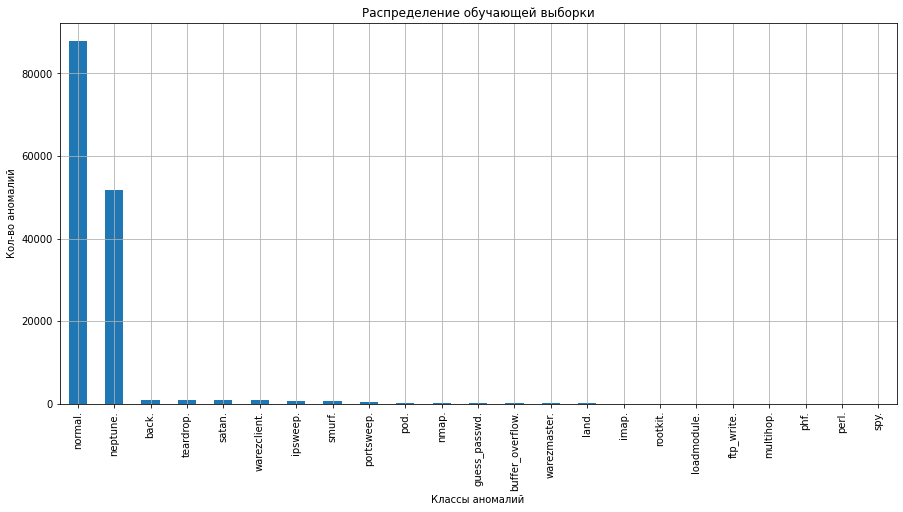

In [8]:
# Анализ загруженного датасет net_an
import matplotlib.pyplot as diag             # импорт необходимых библиотек
from matplotlib.pyplot import *              # импорт необходимых библиотек
 
diag.figure(figsize=(15,7))                  # поле диаграммы  
an_classes = net_an['target'].value_counts() # формирование списка классов аномалий и количества каждой из них в net_an
an_classes.plot(kind='bar')                  # создание диаграммы
diag.xlabel('Классы аномалий')               # подпись оси Х
diag.ylabel('Кол-во аномалий')               # подпись оси Y
diag.title('Распределение обучающей выборки')# заголовок диаграммы
diag.grid()                                  # сетка диаграммы 
diag.show()                                  # показать диаграмму

In [9]:
# сортировка классов аномалий по убыванию частот
anomalies_classes_sort = np.argsort(-an_classes.values)
# цикл по классам аномалий
for i in anomalies_classes_sort:
  # вывод информации о количестве аномалий текущего класса (в % от общего)
    print('Кол-во аномалий класса ', an_classes.index[i],':', an_classes.values[i], 
          '(', np.round((an_classes.values[i]/net_an.shape[0]*100), 3), '%)')
    

Кол-во аномалий класса  normal. : 87832 ( 60.33 %)
Кол-во аномалий класса  neptune. : 51820 ( 35.594 %)
Кол-во аномалий класса  back. : 968 ( 0.665 %)
Кол-во аномалий класса  teardrop. : 918 ( 0.631 %)
Кол-во аномалий класса  satan. : 906 ( 0.622 %)
Кол-во аномалий класса  warezclient. : 893 ( 0.613 %)
Кол-во аномалий класса  ipsweep. : 651 ( 0.447 %)
Кол-во аномалий класса  smurf. : 641 ( 0.44 %)
Кол-во аномалий класса  portsweep. : 416 ( 0.286 %)
Кол-во аномалий класса  pod. : 206 ( 0.141 %)
Кол-во аномалий класса  nmap. : 158 ( 0.109 %)
Кол-во аномалий класса  guess_passwd. : 53 ( 0.036 %)
Кол-во аномалий класса  buffer_overflow. : 30 ( 0.021 %)
Кол-во аномалий класса  warezmaster. : 20 ( 0.014 %)
Кол-во аномалий класса  land. : 19 ( 0.013 %)
Кол-во аномалий класса  imap. : 12 ( 0.008 %)
Кол-во аномалий класса  rootkit. : 10 ( 0.007 %)
Кол-во аномалий класса  loadmodule. : 9 ( 0.006 %)
Кол-во аномалий класса  ftp_write. : 8 ( 0.005 %)
Кол-во аномалий класса  multihop. : 7 ( 0.005 %)

In [10]:
ENCODING = 'utf-8'
#=== функция формирования расширенной информации по каждому столбцу dataset net_an
# в качестве param передается содержимое столбца
def form_info(param):
    res_list = []        # результирующий список
    column_count = param.value_counts() # кол-во меток в столбце (значений)
    column_length = float(len(param))   # общая длина столбца
    for count in column_count.index:     # цикл по меткам столбца
        res_list.append("{}:{}%".format(count,round(100*(column_count[count]/column_length),2))) # добавление метки и ее частоты в результирующий список
    return "[{}]".format(",".join(res_list))

#===функция анализа содержимого dataset net_an  
# на вход подается датасет      
def research(net_an):
    print()                               # печать пустой строки
    columns = net_an.columns.values       # список столбцов датасета
    ds_ts = float(len(net_an))            # общий размер датасета

    print("{} строк".format(int(ds_ts)))  # вывод общего размера датасета
    for count in columns:                 # цикл по столбцам датасет          
        column_un = net_an[count].unique()# список уникальных значений в столбце
        column_un_count = len(column_un)  # кол-во уникальных значений в столбце
        if column_un_count>100:           # если их кол-во больше 100 
            print("** {}:{} ({}%)".format(count,column_un_count,int(((column_un_count)/ds_ts)*100))) # вывод в общем виде
        else: # если меньше 100
            print("** {}:{}".format(count,form_info(net_an[count]))) 
            form_info(net_an[count])                                   # вывод детальной информации


In [11]:
# непосредственное исследование содержимого датасета net_an

import pandas as pd                 # импорт необходимых библиотек
import os                           # импорт необходимых библиотек
import numpy as np                  # импорт необходимых библиотек
from sklearn import metrics         # импорт необходимых библиотек
from scipy.stats import zscore      # импорт необходимых библиотек

research(net_an)                    # вызов функции анализа датасета по столбцам


145586 строк
** duration:2495 (1%)
** protocol_type:[tcp:89.92%,udp:8.43%,icmp:1.65%]
** service:[http:42.62%,private:33.7%,smtp:6.68%,domain_u:3.73%,other:3.28%,ftp_data:3.15%,ecr_i:0.71%,eco_i:0.63%,ftp:0.55%,finger:0.46%,telnet:0.35%,urp_i:0.3%,auth:0.23%,ntp_u:0.2%,pop_3:0.14%,time:0.1%,csnet_ns:0.09%,remote_job:0.08%,gopher:0.08%,imap4:0.08%,discard:0.08%,iso_tsap:0.08%,systat:0.08%,domain:0.08%,echo:0.08%,rje:0.08%,shell:0.08%,whois:0.08%,sql_net:0.08%,courier:0.07%,printer:0.07%,nntp:0.07%,sunrpc:0.07%,netbios_ssn:0.07%,mtp:0.07%,klogin:0.07%,vmnet:0.07%,uucp_path:0.07%,supdup:0.07%,ssh:0.07%,nnsp:0.07%,uucp:0.07%,bgp:0.07%,hostnames:0.07%,daytime:0.07%,login:0.07%,link:0.07%,netbios_ns:0.07%,efs:0.07%,pop_2:0.07%,ldap:0.07%,http_443:0.07%,exec:0.07%,netbios_dgm:0.07%,kshell:0.07%,name:0.07%,ctf:0.07%,netstat:0.07%,Z39_50:0.06%,IRC:0.03%,urh_i:0.01%,X11:0.01%,tim_i:0.0%,pm_dump:0.0%,tftp_u:0.0%,red_i:0.0%]
** flag:[SF:60.07%,S0:29.04%,REJ:10.11%,RSTO:0.39%,RSTR:0.29%,S1:0.04%,S

In [12]:
# Изменение датасет (категоризация и нормализация данных)
#===функция перевода числовых столбцов в z-оценки
def transform_num_to_zscore(net_an, moniker, param_1=None, param_2=None):
    if param_1 is None:         # если среднее значение интервала не задано
        param_1 = net_an[moniker].mean() # то присвоить ему среднее значение элементов столбца

    if param_2 is None:         # если стандартное отклонение интервала не задано
        param_2 = net_an[moniker].std()  # то присвоить ему стандартное отклонение элементов столбца

    net_an[moniker] = (net_an[moniker] - param_1) / param_2  # перевод значений столбца
    
#===функция кодирования значений текстовых столбцов в фиктивные переменные (например, [1,0,0],[0,1,0],[0,0,1] для красный, зеленый, синий)
def transform_text_to_fiction(net_an, moniker):
    fictions = pd.get_dummies(net_an[moniker])        # получение списка текстовых значений столбца
    for ttt in fictions.columns:                      # цикл по списку
        fiction_moniker = f"{moniker}-{ttt}"          # перекодирование                
        net_an[fiction_moniker] = fictions[ttt]       # запись значений в ждатасет
    net_an.drop(moniker, axis=1, inplace=True)        # удаление строк по условию

In [13]:
# соответствующее перекодирование столбцов dataset net_an
transform_num_to_zscore(net_an, 'duration')                              # нормализация значений столбца duration
transform_text_to_fiction(net_an, 'protocol_type')                       # категоризация значений столбца protocol_type
transform_text_to_fiction(net_an, 'service')                             # категоризация значений столбца service
transform_text_to_fiction(net_an, 'flag')                                # категоризация значений столбца flag
transform_num_to_zscore(net_an, 'src_bytes')                             # нормализация значений столбца src_bytes
transform_num_to_zscore(net_an, 'dst_bytes')                             # нормализация значений столбца dst_bytes
transform_text_to_fiction(net_an, 'land')                                # категоризация значений столбца land
transform_num_to_zscore(net_an, 'wrong_fragment')                        # нормализация значений столбца wrong_fragment
transform_num_to_zscore(net_an, 'urgent')                                # нормализация значений столбца urgent
transform_num_to_zscore(net_an, 'hot')                                   # нормализация значений столбца hot
transform_num_to_zscore(net_an, 'num_failed_logins')                     # нормализация значений столбца num_failed_logins 
transform_text_to_fiction(net_an, 'logged_in')                           # категоризация значений столбца logged_in
transform_num_to_zscore(net_an, 'num_compromised')                       # нормализация значений столбца num_compromised
transform_num_to_zscore(net_an, 'root_shell')                            # нормализация значений столбца root_shell
transform_num_to_zscore(net_an, 'su_attempted')                          # нормализация значений столбца su_attempted
transform_num_to_zscore(net_an, 'num_root')                              # нормализация значений столбца num_root
transform_num_to_zscore(net_an, 'num_file_creations')                    # нормализация значений столбца num_file_creations
transform_num_to_zscore(net_an, 'num_shells')                            # нормализация значений столбца num_shells
transform_num_to_zscore(net_an, 'num_access_files')                      # нормализация значений столбца num_access_files
transform_num_to_zscore(net_an, 'num_outbound_cmds')                     # нормализация значений столбца num_outbound_cmds
transform_text_to_fiction(net_an, 'is_host_login')                       # категоризация значений столбца is_host_login
transform_text_to_fiction(net_an, 'is_guest_login')                      # категоризация значений столбца is_guest_login
transform_num_to_zscore(net_an, 'count')                                 # нормализация значений столбца count
transform_num_to_zscore(net_an, 'srv_count')                             # нормализация значений столбца srv_count
transform_num_to_zscore(net_an, 'serror_rate')                           # нормализация значений столбца serror_rate
transform_num_to_zscore(net_an, 'srv_serror_rate')                       # нормализация значений столбца srv_serror_rate
transform_num_to_zscore(net_an, 'rerror_rate')                           # нормализация значений столбца rerror_rate 
transform_num_to_zscore(net_an, 'srv_rerror_rate')                       # нормализация значений столбца srv_rerror_rate
transform_num_to_zscore(net_an, 'same_srv_rate')                         # нормализация значений столбца same_srv_rate
transform_num_to_zscore(net_an, 'diff_srv_rate')                         # нормализация значений столбца diff_srv_rate
transform_num_to_zscore(net_an, 'srv_diff_host_rate')                    # нормализация значений столбца srv_diff_host_rate
transform_num_to_zscore(net_an, 'dst_host_count')                        # нормализация значений столбца dst_host_count
transform_num_to_zscore(net_an, 'dst_host_srv_count')                    # нормализация значений столбца dst_host_srv_count
transform_num_to_zscore(net_an, 'dst_host_same_srv_rate')                # нормализация значений столбца dst_host_same_srv_rate
transform_num_to_zscore(net_an, 'dst_host_diff_srv_rate')                # нормализация значений столбца dst_host_diff_srv_rate
transform_num_to_zscore(net_an, 'dst_host_same_src_port_rate')           # нормализация значений столбца dst_host_same_src_port_rate
transform_num_to_zscore(net_an, 'dst_host_srv_diff_host_rate')           # нормализация значений столбца dst_host_srv_diff_host_rate
transform_num_to_zscore(net_an, 'dst_host_serror_rate')                  # нормализация значений столбца dst_host_serror_rate
transform_num_to_zscore(net_an, 'dst_host_srv_serror_rate')              # нормализация значений столбца dst_host_srv_serror_rate
transform_num_to_zscore(net_an, 'dst_host_rerror_rate')                  # нормализация значений столбца dst_host_rerror_rate
transform_num_to_zscore(net_an, 'dst_host_srv_rerror_rate')              # нормализация значений столбца dst_host_srv_rerror_rate

# вывод содержимого преобразованного датасета net_an (первых пяти строк)

net_an.dropna(inplace=True,axis=1)             # удаление из датасета строк с пустыми значениями
net_an[0:5]                                    # вывод таблицы 
# фактически, получился числовой вектор признаков, который будет подан в нейронную сеть для обучения


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
0,-0.10785,-0.004293,0.042595,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,0,1,0,1,0,0,1,1,1,0
1,-0.10785,-0.004261,-0.039036,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,0,1,0,1,0,0,1,1,1,0
2,-0.10785,-0.004263,-0.025042,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,0,1,0,1,0,0,1,1,1,0
3,-0.10785,-0.004272,-0.025042,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,0,1,0,1,0,0,1,1,1,0
4,-0.10785,-0.004273,-0.013613,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,0,1,0,1,0,0,1,1,1,0


In [14]:
# разделение столбцов на входные и результирующие
x_variables = net_an.columns.drop('target')                  # формирование списка из всех столбцов, за исключением target
x = net_an[x_variables].values                               # формирование списка входов нейронной сети
fictions = pd.get_dummies(net_an['target'])                  # классы аномалий 
targets = fictions.columns                                   # список столбцов результирующих  
classes_of_anomalies_count = len(targets)                    # количество классов аномалий  
y = fictions.values                                          # список выходных классов НС

In [15]:
net_an.groupby('target')['target'].count()                   # статистика частоты аномалий по классам

target
back.                 968
buffer_overflow.       30
ftp_write.              8
guess_passwd.          53
imap.                  12
ipsweep.              651
land.                  19
loadmodule.             9
multihop.               7
neptune.            51820
nmap.                 158
normal.             87832
perl.                   3
phf.                    4
pod.                  206
portsweep.            416
rootkit.               10
satan.                906
smurf.                641
spy.                    2
teardrop.             918
warezclient.          893
warezmaster.           20
Name: target, dtype: int64

In [16]:
import pandas as pd                                            # импорт необходимых библиотек
import io                                                      # импорт необходимых библиотек
import requests                                                # импорт необходимых библиотек
import numpy as np                                             # импорт необходимых библиотек
import os                                                      # импорт необходимых библиотек
from sklearn.model_selection import train_test_split           # импорт необходимых библиотек
from sklearn import metrics                                    # импорт необходимых библиотек
from tensorflow.keras.models import Sequential                 # импорт необходимых библиотек
from tensorflow.keras.layers import Dense, Activation          # импорт необходимых библиотек
from tensorflow.keras.callbacks import EarlyStopping           # импорт необходимых библиотек

# создание обучающей и тестовой выборок. Объем тестовой составляет 25%
# разделение исходного датасета на тестовую и обучающую выборки
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# создание нейронной сети
my_mod = Sequential()   # создание модели
my_mod.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu')) # добавление слоя
my_mod.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu')) # добавление слоя
my_mod.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu')) # добавление слоя
my_mod.add(Dense(1, kernel_initializer='normal')) # добавление слоя
my_mod.add(Dense(y.shape[1],activation='softmax')) # добавление слоя
my_mod.compile(loss='categorical_crossentropy', optimizer='adam') # настройка процесса обучения модели
my_mon = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto') # настройки модели
my_mod.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[my_mon],verbose=2,epochs=19) # запуск обучения модели

Epoch 1/19
3413/3413 - 8s - loss: 0.4313 - val_loss: 0.1840 - 8s/epoch - 2ms/step
Epoch 2/19
3413/3413 - 7s - loss: 0.1660 - val_loss: 0.1388 - 7s/epoch - 2ms/step
Epoch 3/19
3413/3413 - 7s - loss: 0.1316 - val_loss: 0.1114 - 7s/epoch - 2ms/step
Epoch 4/19
3413/3413 - 8s - loss: 0.1110 - val_loss: 0.0990 - 8s/epoch - 2ms/step
Epoch 5/19
3413/3413 - 8s - loss: 0.1018 - val_loss: 0.0919 - 8s/epoch - 2ms/step
Epoch 6/19
3413/3413 - 8s - loss: 0.0970 - val_loss: 0.0872 - 8s/epoch - 2ms/step
Epoch 7/19
3413/3413 - 8s - loss: 0.0927 - val_loss: 0.0838 - 8s/epoch - 2ms/step
Epoch 8/19
3413/3413 - 7s - loss: 0.0904 - val_loss: 0.0804 - 7s/epoch - 2ms/step
Epoch 9/19
3413/3413 - 7s - loss: 0.0878 - val_loss: 0.0773 - 7s/epoch - 2ms/step
Epoch 10/19
3413/3413 - 8s - loss: 0.0861 - val_loss: 0.0776 - 8s/epoch - 2ms/step
Epoch 11/19
3413/3413 - 8s - loss: 0.0850 - val_loss: 0.0808 - 8s/epoch - 2ms/step
Epoch 12/19
3413/3413 - 7s - loss: 0.0818 - val_loss: 0.0759 - 7s/epoch - 2ms/step
Epoch 13/19
3

In [17]:
#полученные результаты обучения модели
import tensorflow.keras.backend as Ker                # импорт необходимых библиотек
print('Скорость обучения: ')                          # вывод наименования параметра
print(Ker.eval(my_mod.optimizer.lr))                  # вывод значения параметра
print('+'*60)                                         # вывод разделительной линии
my_mod.summary()                                      # вывод статистики обучения

Скорость обучения: 
0.001
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1210      
                                                                 
 dense_1 (Dense)             (None, 50)                550       
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
 dense_4 (Dense)             (None, 23)                46        
                                                                 
Total params: 2,327
Trainable params: 2,327
Non-trainable params: 0
_________________________________

In [25]:
import seaborn as sns               # импорт необходимых библиотек
import datetime as dt               # импорт необходимых библиотек
import matplotlib.pyplot as plt     # импорт необходимых библиотек

#===Функция создания тепловой матрицы путаницы
def form_confmatr(param_yt, param_ytp):
    
    '''
    Эта функция строит матрицу путаницы с помощью фактических и прогнозируемых значений и строит тепловую карту матрицы путаницы
    '''
    cm = confusion_matrix(param_yt, param_ytp)       # формирование матрицы путаницы
    cm_net_an = pd.DataFrame(cm)                     # преобразование ее к набору данных 
    # перечисление наименований возможных вторжений
    marks = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf', 'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))                      # поле диаграммы
    sns.set(font_scale=1.4)                          # параметры диаграммы
    sns.heatmap(cm_net_an, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=marks, yticklabels=marks)  # построение тепловой карты
    plt.ylabel('Фактический класс')                  # подпись оси Y
    plt.xlabel('Предсказанный класс')                # подпись оси X
    
    plt.show()                                       # отображение матрицы 

# расчет кривой roc
from sklearn.metrics import *                        # импорт необходимых библиотек  
from sklearn import preprocessing                    # импорт необходимых библиотек
#===функция формирования кривой roc
def form_mroc_aucscore(param_yt, param_pred, average="macro"):
    temp_par = preprocessing.LabelBinarizer()        # бинаризация 
    temp_par.fit(param_yt)                           # формирование roc  
    param_yt = temp_par.transform(param_yt)          # изменение фактических значений
    param_pred = temp_par.transform(param_pred)      # изменение предсказанных значений
    return roc_auc_score(param_yt, param_pred, average=average)

In [23]:
# вывод информации об обучающей и тестовой выборках
print('Обучающая выборка')                    # печать заголовка
print(x_train.shape)                          # размерность обучающей выборки х
print(y_train.shape)                          # размерность обучающей выборки y
print('+'*50)                                 # вывод разделительной полосы
print('Тестовая выборка')                     # печать заголовка 
print(x_test.shape)                           # размерность тестовой выборки х 
print(y_test.shape)                           # размерность тестовой выборки y 
print('+'*50)                                 # вывод разделительной полосы 

# вычисление точности модели
# загрузка необходимых библиотек
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
print('Прогнозирование на тестовых данных:')                  # печать заголовка    
begin = dt.datetime.now()                                     # запуск таймера 
res_esc = my_mod.evaluate(x_test, y_test, batch_size=32)      # расчет
res_pred = my_mod.predict(x_test)                             # прогнозирование    
res_pred = np.argmax(res_pred,axis=1)                         # продолжение прогнозирования
res_y_eval = np.argmax(y_test,axis=1)                         # результаты прогнозирования 

res_vsc = metrics.accuracy_score(res_y_eval, res_pred)        # расчет метрики 

res_rsc = recall_score(res_y_eval, res_pred, average='weighted')        # расчет метрики 

res_asc = precision_score(res_y_eval, res_pred, average='weighted')     # расчет метрики 

res_f1sc= f1_score(res_y_eval, res_pred, average='weighted')            #метрика F1 = 2 * (precision * recall) / (precision + recall) из описания ее

res_roc_aucsc = form_mroc_aucscore(res_y_eval, res_pred)      # вызов функции расчта roc


print('Завершено')                                                                # завершение прогнозирования (классификации)
print('Затраченное время:',dt.datetime.now()-begin)                               # вывод времени процесса
print('+'*70)                                                                     # вывод разделительной линии
print("Точность правильных ответов (Validation score): {}".format(res_vsc))       # вывод значения метрики accuracy
print('+'*70)                                                                     # вывод разделительной линии
print("Потери на тестовой выборке (Evaluation score): {}".format(res_esc))        # вывод потерь на тестовой выборке
print('+'*70)                                                                     # вывод разделительной линии 
print("Полнота модели (Recall score): {}".format(res_rsc))                        # вывод метрики полноты 
print('+'*70)                                                                     # вывод разделительной линии
print("Точность модели (Precision score): {}".format(res_asc))                    # вывод метрики точности
print('+'*70)                                                                     # вывод разделительной линии
print("Гармоничность модели (F1 score): {}".format(res_f1sc))                     # вывод метрики гармоничности
print('+'*70)                                                                     # вывод разделительной линии
print("Метрика ROC-AUC (ROC-AUC score): {}".format(res_roc_aucsc))                # вывод метрики ROC-AUC

Обучающая выборка
(109189, 120)
(109189, 23)
++++++++++++++++++++++++++++++++++++++++++++++++++
Тестовая выборка
(36397, 120)
(36397, 23)
++++++++++++++++++++++++++++++++++++++++++++++++++
Прогнозирование на тестовых данных:
1138/1138 [==============================] - 2s 1ms/step - loss: 0.0709
Завершено
Затраченное время: 0:00:04.053952
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Точность правильных ответов (Validation score): 0.9856581586394483
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Потери на тестовой выборке (Evaluation score): 0.07094302773475647
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Полнота модели (Recall score): 0.9856581586394483
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Точность модели (Precision score): 0.9830871955720853
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Гармоничность модели (F1 score): 0.981957630017605
+++++++++++++++

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


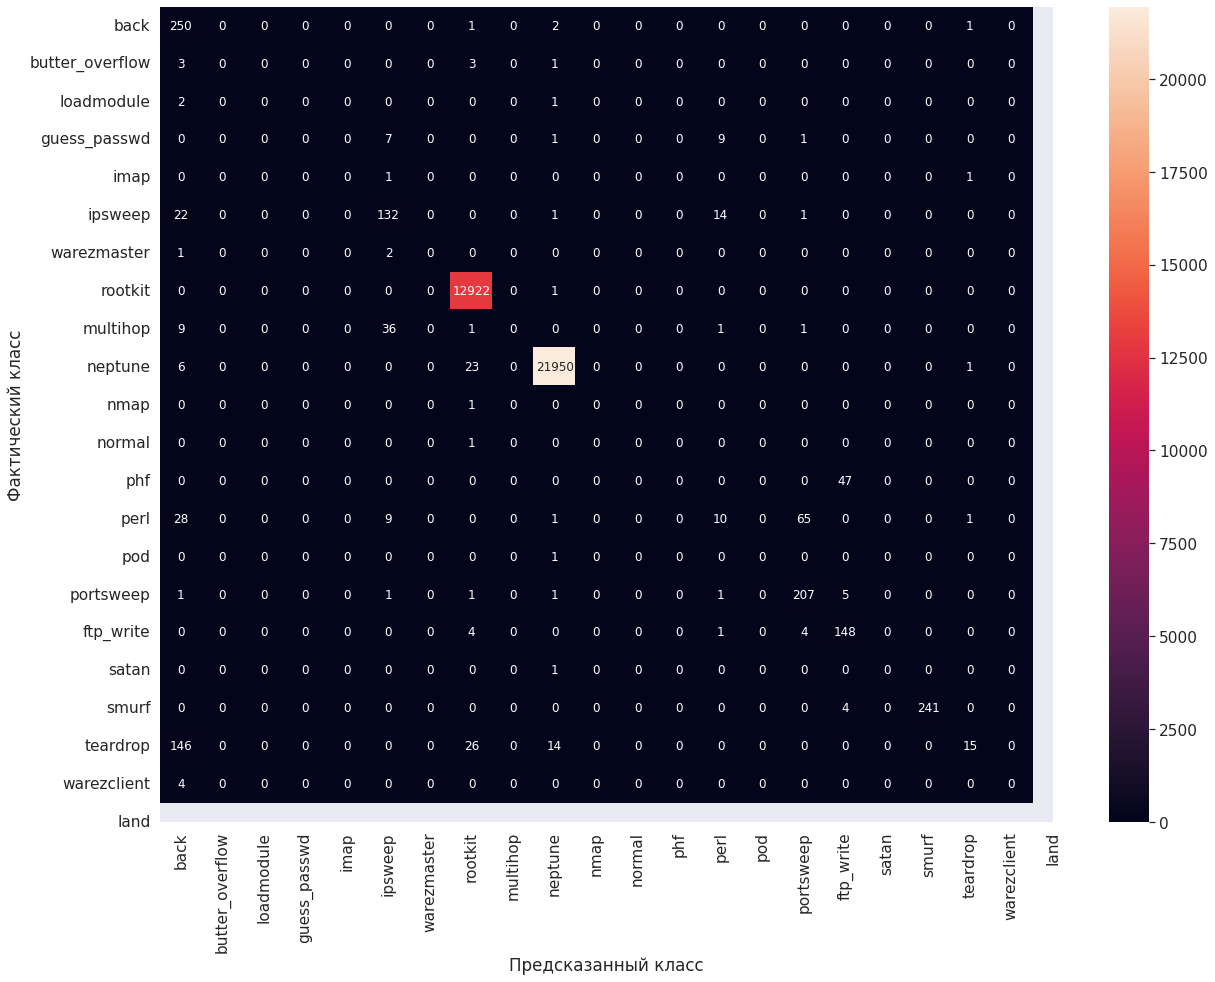

In [26]:
# вывод тепловой карты распределения матрицы путаницы
form_confmatr(res_y_eval, res_pred)